# <b> Kaggle House Prices Prediction Model </b>

## 1. Importing libraries and sh#t.

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import scipy.stats as stats


In [2]:
#for any warning in the code
warnings.filterwarnings('ignore')

## 2. Loading Datasets

In [3]:
train = pd.read_csv('train.csv')

test = pd.read_csv('test.csv')

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 3. EDA

### 3.1 Correlations to sales price

In [5]:
#Squared correlations
sqr_corr = (train.corr()**2)["SalePrice"].sort_values(ascending = False)

In [6]:
#top 10 most correlated columns
sqr_corr[:10]

SalePrice       1.000000
OverallQual     0.625652
GrLivArea       0.502149
GarageCars      0.410124
GarageArea      0.388667
TotalBsmtSF     0.376481
1stFlrSF        0.367057
FullBath        0.314344
TotRmsAbvGrd    0.284860
YearBuilt       0.273422
Name: SalePrice, dtype: float64

<b>Overqual</b>, <b>Garage</b> and <b>Area</b> are important because they have the best correlation in the dataset with the predicted value. 

### 3.2 Verifiying the distributions of sales price 

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

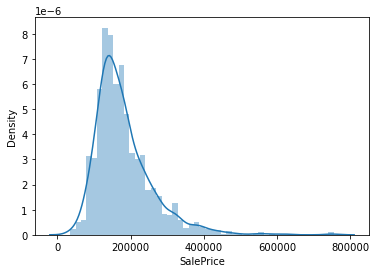

In [7]:
## plot the histogram. 
sns.distplot(train.loc[:,'SalePrice'], norm_hist=True)

we can normalize that data using logarithms

In [8]:
train["SalePrice"] = np.log1p(train["SalePrice"])

now, lets see the result

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

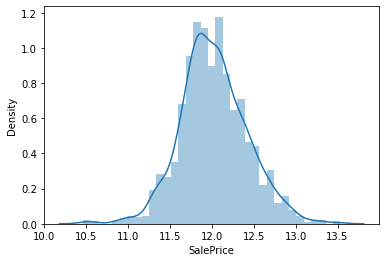

In [9]:
## plot the histogram. 
sns.distplot(train.loc[:,'SalePrice'], norm_hist=True)

Text(0.5, 1.0, 'Probability of the normalized sales price values')

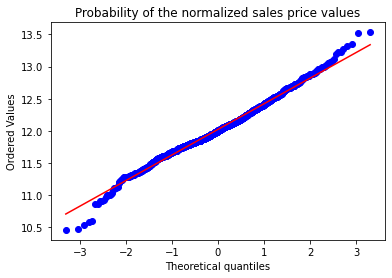

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(train.loc[:,'SalePrice'], plot = ax)
ax.set_title("Probability of the normalized sales price values")